In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

In [2]:
def make_ini_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    y=(xl[t_vl==t] * 512)
    x=((1-yl[t_vl==t]) * 512)

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2CNet(positions)  # Pass the positions list to the ind2CNet function

    #image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    
def make_id_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)
    ide=idel[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2id(positions,idel,ide)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    
    
def make_circ_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2circ(positions)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/'
    
    output_path = save_dir+'/circ/'+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    #image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    #plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


def ind2CNet(ind_list):

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    positions = ind_list
    #print('ind',ind_list)



    # Loop over the positions and draw a circle around each one
    for position in positions:
        # Convert the position to integer coordinates
        #try:
        x, y = int(position[0]), int(position[1])

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = 255
                    except IndexError:
                        pass#print('IndErr',i,j)
        #except: 
           # pass


    return image_tensor

def sort_key(file_name):
    # Extract the number from the file name
    number = re.findall(r'\d+', file_name)
    if number:
        return int(number[0])
    else:
        return 0

def ind2circ(ind_list):
    # Define the image tensor with 3 channels (RGB)
    image_tensor =  np.ones((512, 512, 3), dtype=np.uint8)*255

    # Define the radius of the circle
    radius = 15

    # Define the color of the circle (red)
    color = (0, 0, 255)

    # Define the list of positions
    positions = ind_list

    # Loop over the positions and draw a circle at each one
    for position in positions:
        # Convert the position to integer coordinates
        x, y = int(position[0]), int(position[1])

         # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if (i**2 + j**2) >= (radius-1)**2 and (i**2 + j**2) <= (radius+1)**2:
                    try:
                        image_tensor[x+i, y+j] = color
                    except IndexError:
                        pass
    return image_tensor


def ind2id(ind_list,idel,ide):
    
    max_id = np.max(idel)
    
    c_list = np.linspace(100,255,int(max_id))

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    positions = ind_list
    #print('ind',ind_list)


    k=0
    # Loop over the positions and draw a circle around each one
    for position in positions:
        # Convert the position to integer coordinates
        #try:
        x, y = int(position[0]), int(position[1])
        
        print('**',x,y,ide[k],c_list[int(ide[k]-1)])

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = c_list[int(ide[k]-1)]
                    except IndexError:
                        pass#print('IndErr',i,j)
                    
        k=k+1
        #except: 
           # pass


    return image_tensor


def combine_images(image_folder, circle_folder):
    # Sort file lists
    image_files = sorted(os.listdir(image_folder),key=sort_key)
    print('image_files',image_files)
    circle_files = sorted(os.listdir(circle_folder),key=sort_key)
    print('circ_files',circle_files)

    for img_file, circle_file in zip(image_files, circle_files):
        # Open the base image and the circle image
        image = Image.open(os.path.join(image_folder, img_file))
        circle_image = Image.open(os.path.join(circle_folder, circle_file))
        
        circle_image = circle_image.convert("RGBA")
        datas = circle_image.getdata()

        new_data = []
        for item in datas:
            # change all white (also shades of whites)
            # pixels to transparent
            if item[1] > 40 and item[2] > 40:
                new_data.append((item[0], item[1], item[2], 0))
            else:
                new_data.append(item)
                
        circle_image.putdata(new_data)

        # Scale the circle image
        circle_image = circle_image.resize((512, 512), Image.ANTIALIAS)

        # Copy the circle layer onto the base image
        image.paste(circle_image, (0,0), circle_image)

        # Save the resulting image
        image.save(os.path.join(image_folder, "combined_" + img_file))


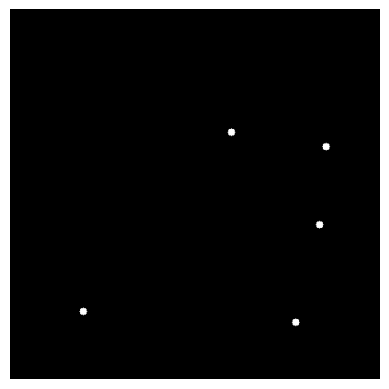

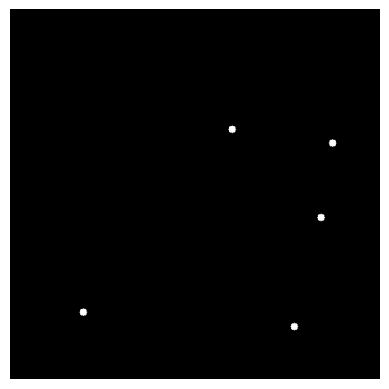

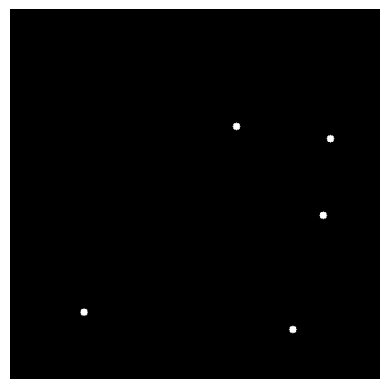

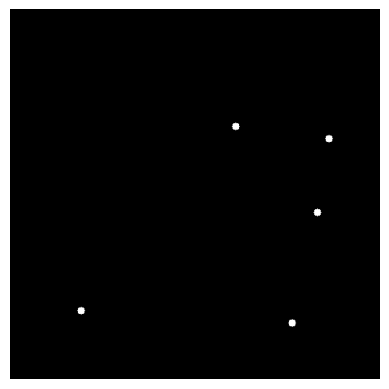

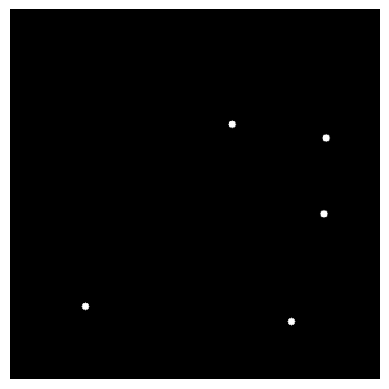

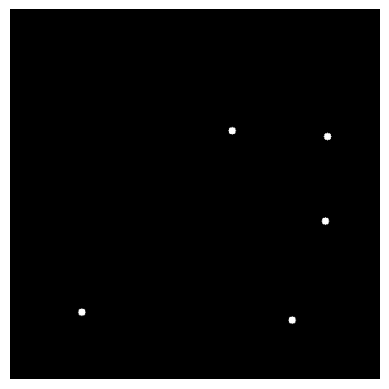

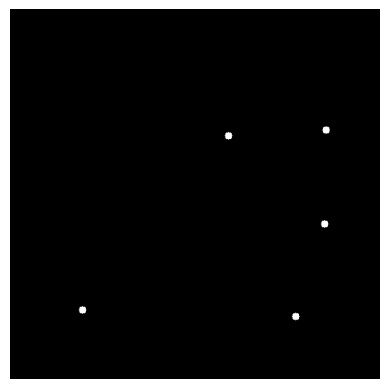

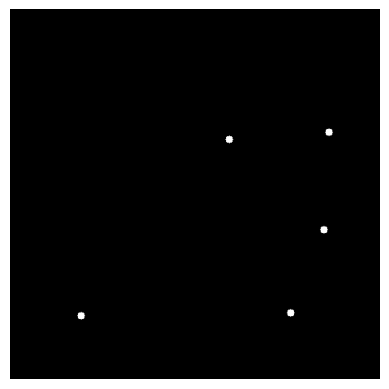

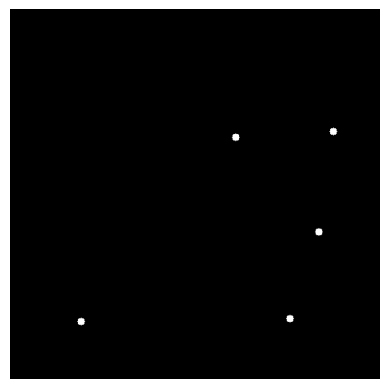

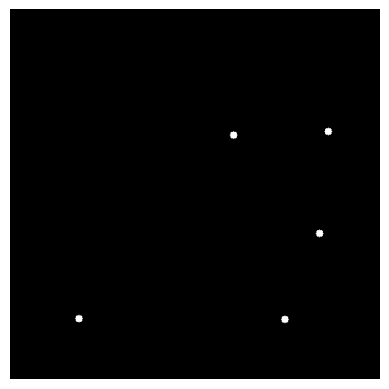

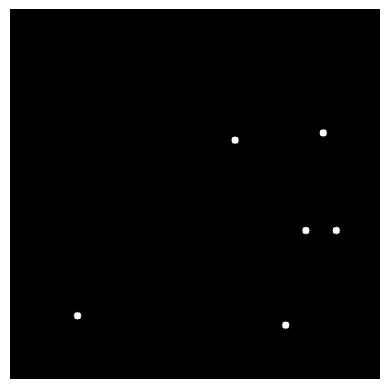

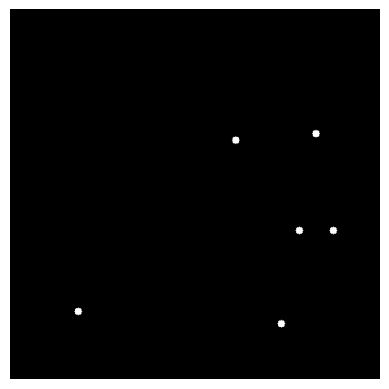

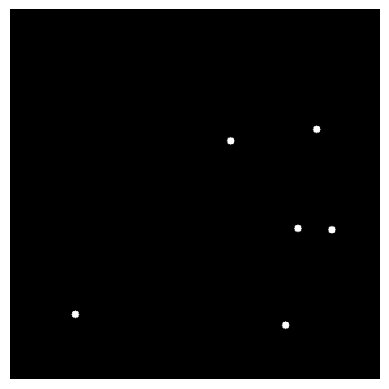

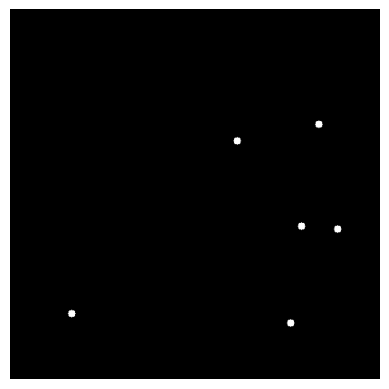

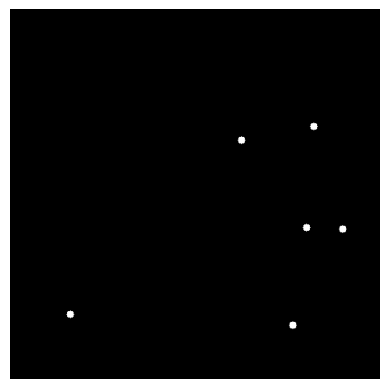

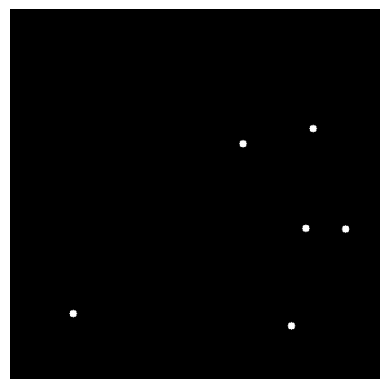

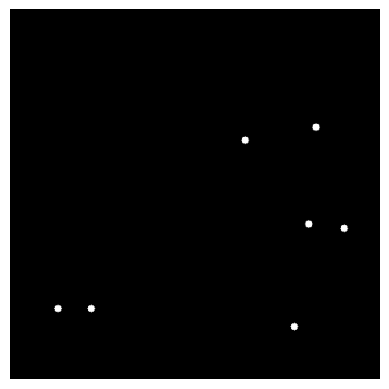

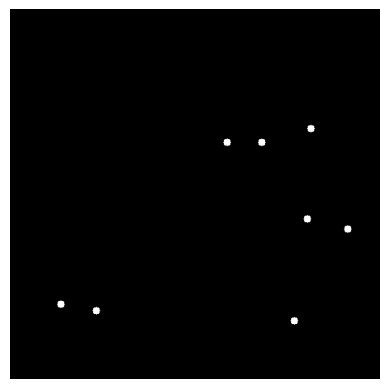

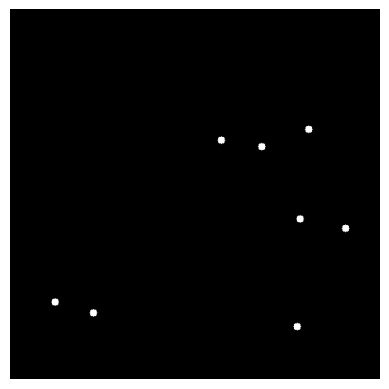

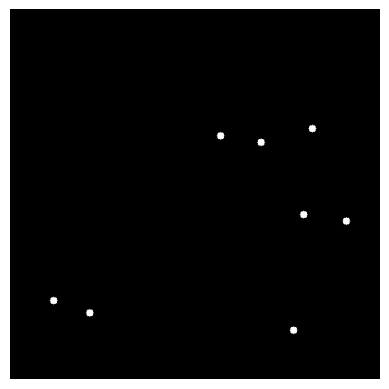

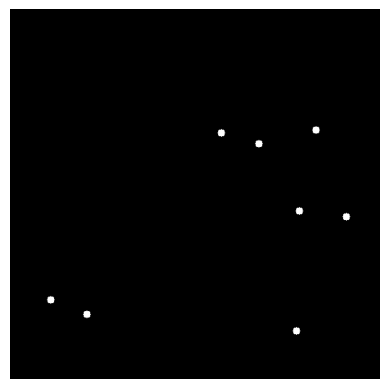

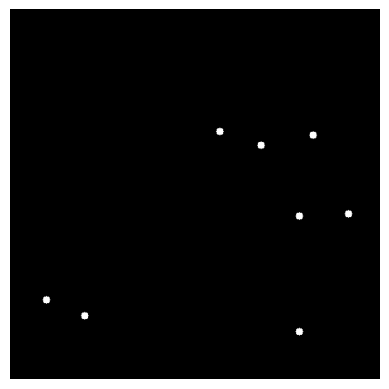

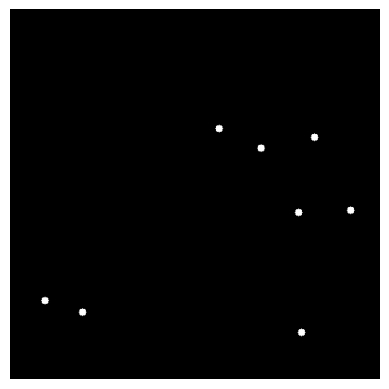

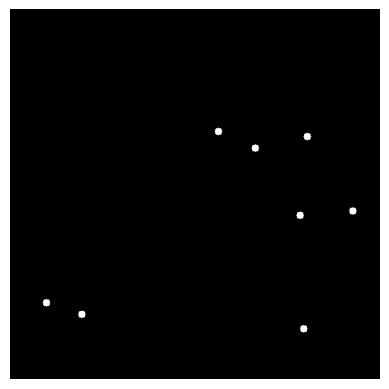

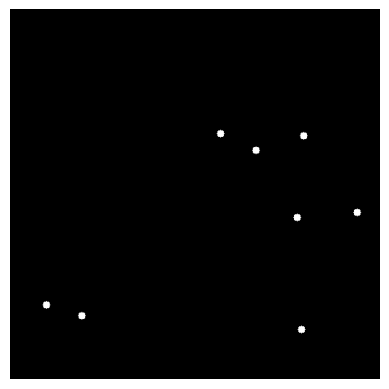

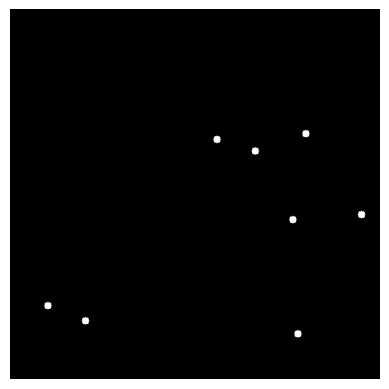

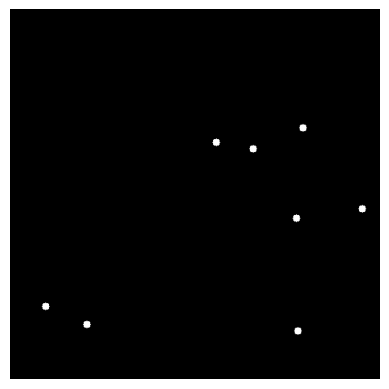

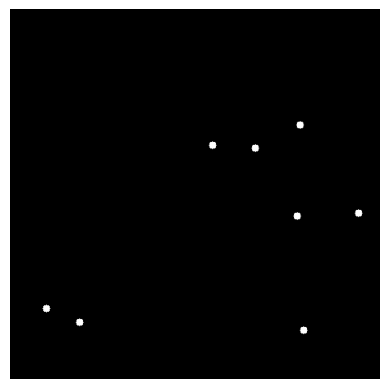

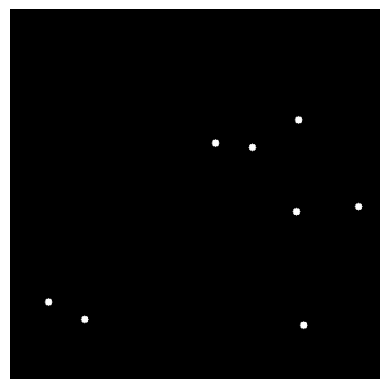

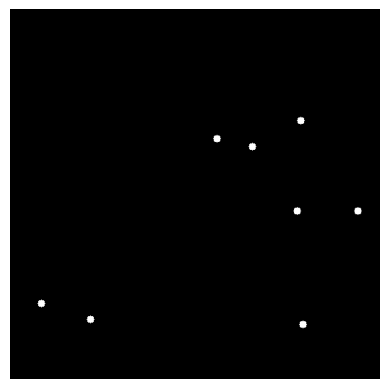

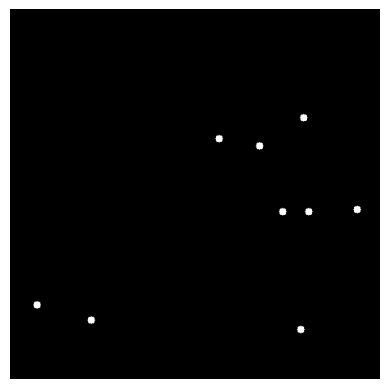

In [3]:
path_GT='1_GT'

for z in range(31):
    make_ini_pic(path_GT, t=z)

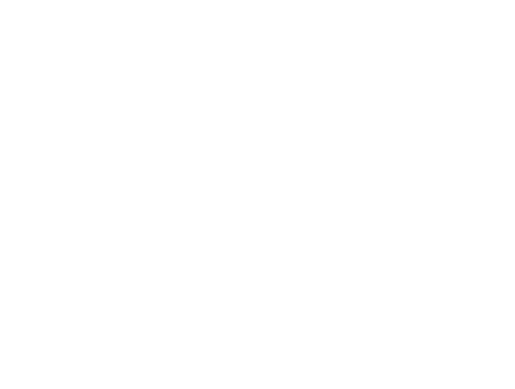

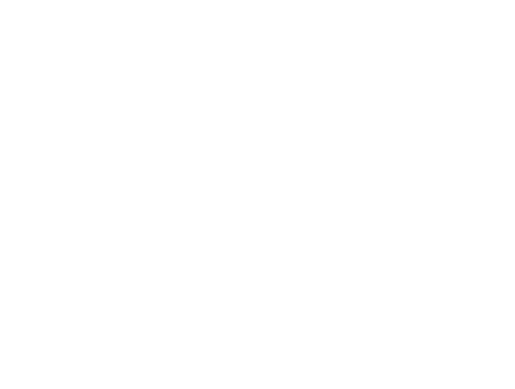

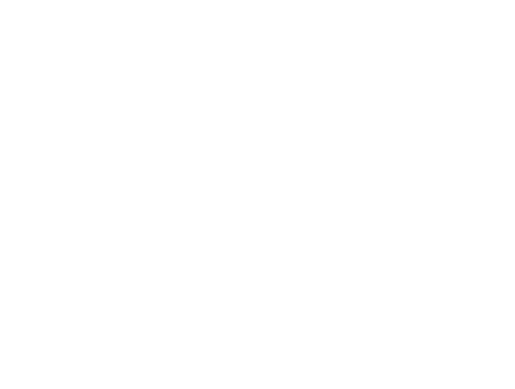

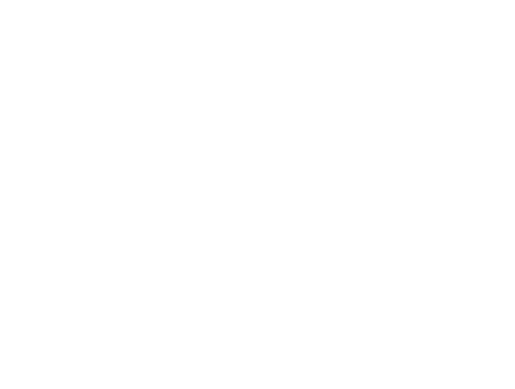

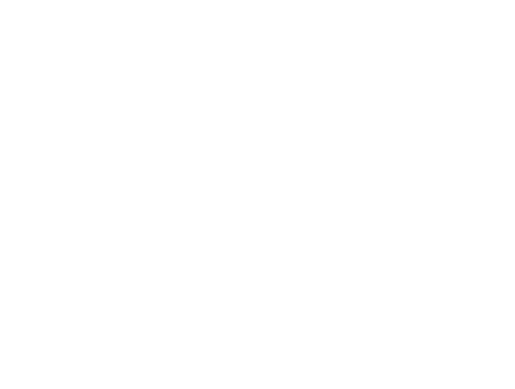

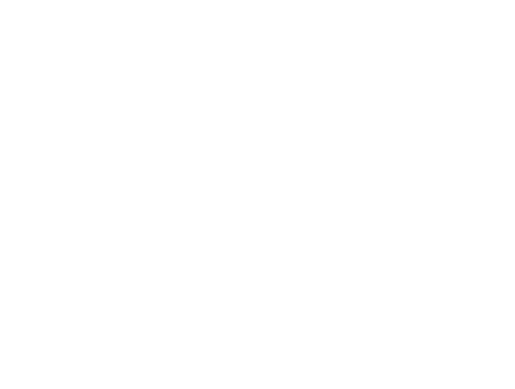

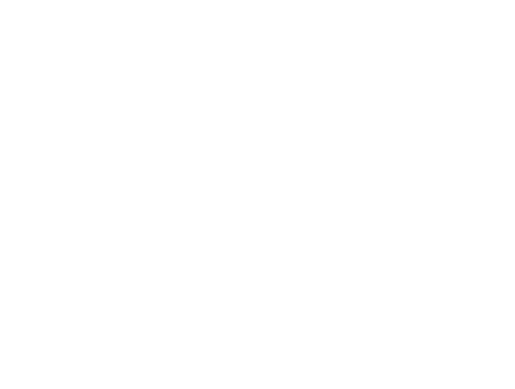

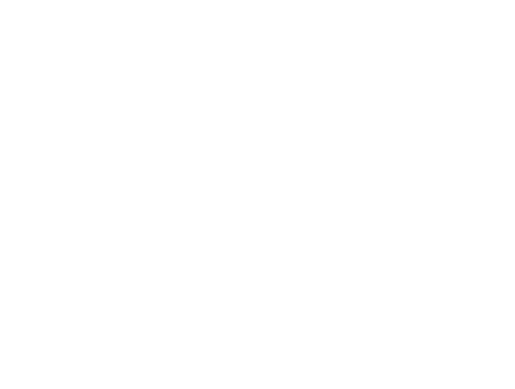

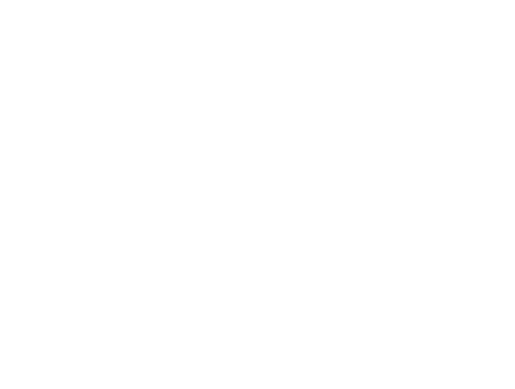

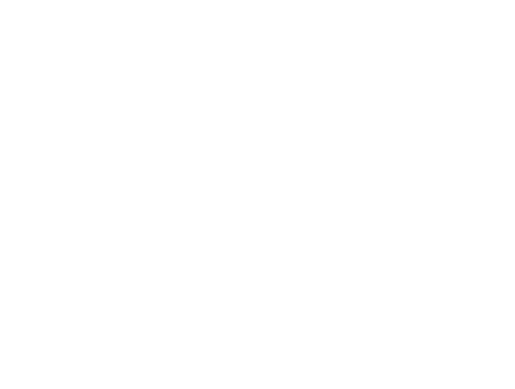

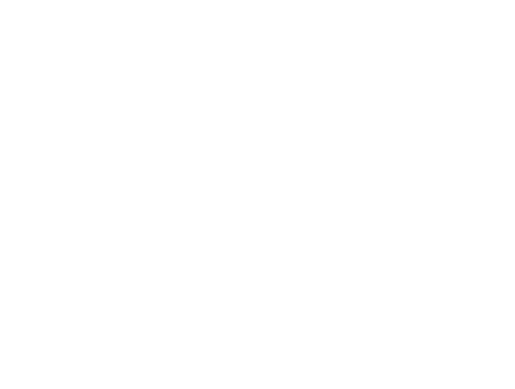

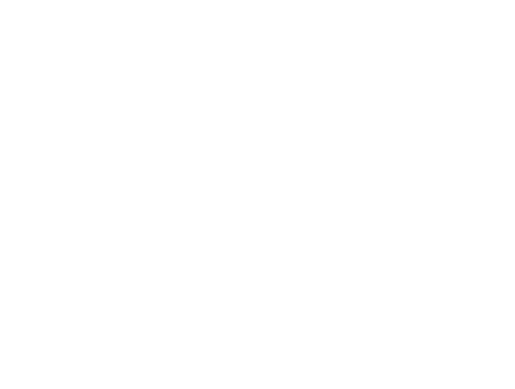

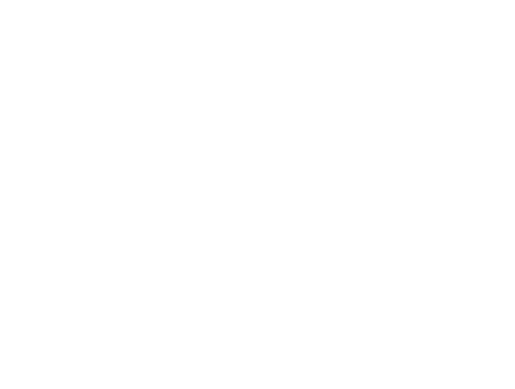

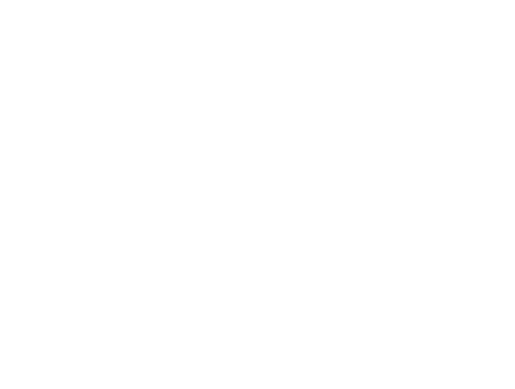

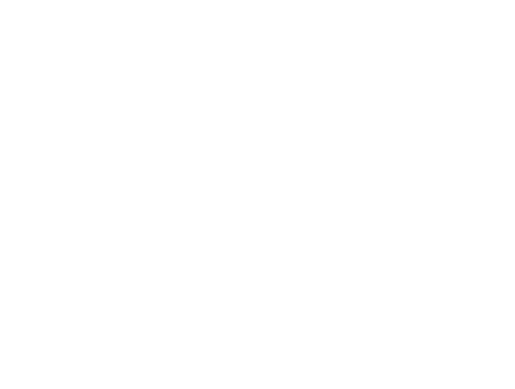

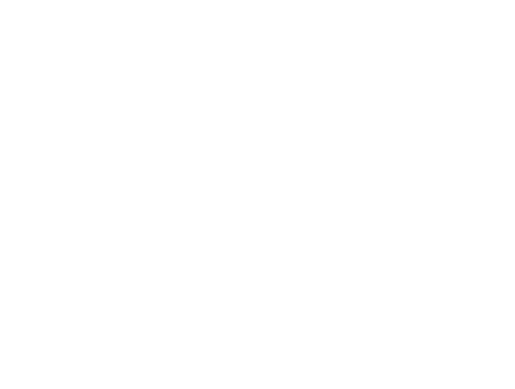

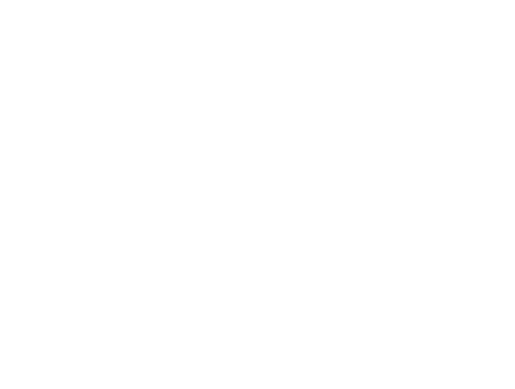

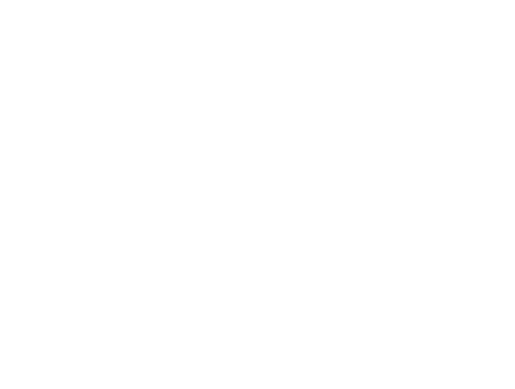

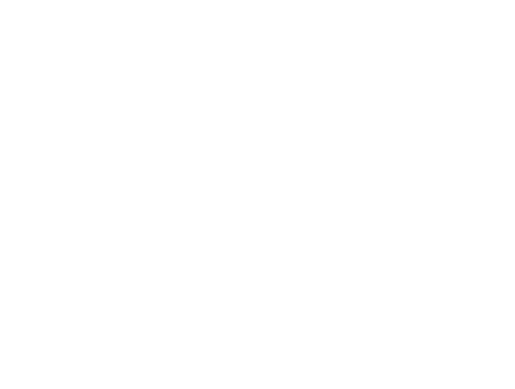

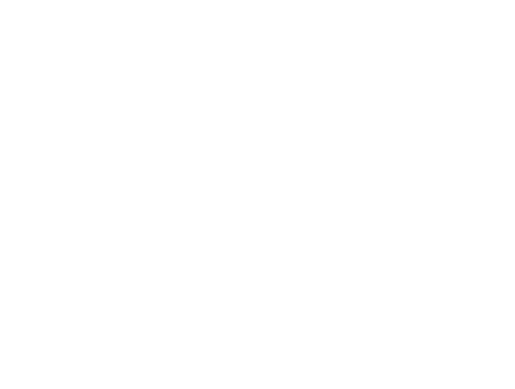

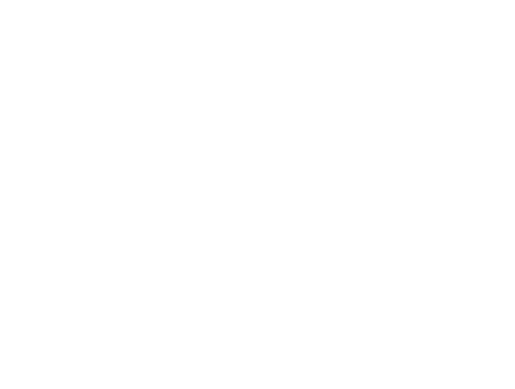

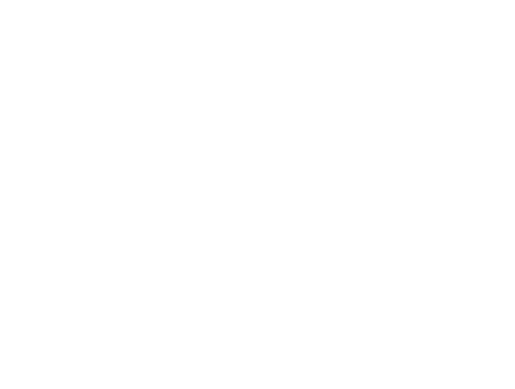

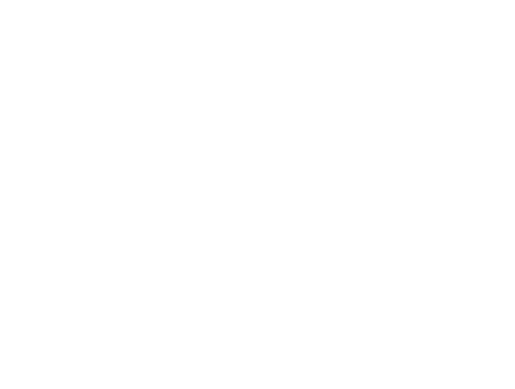

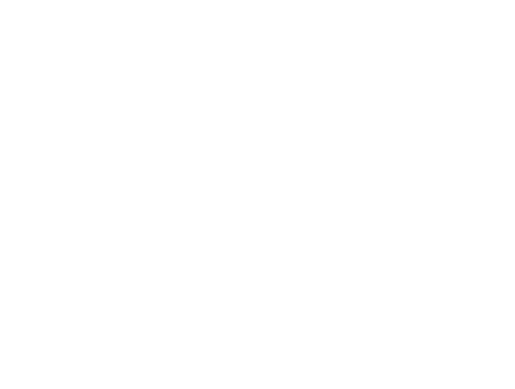

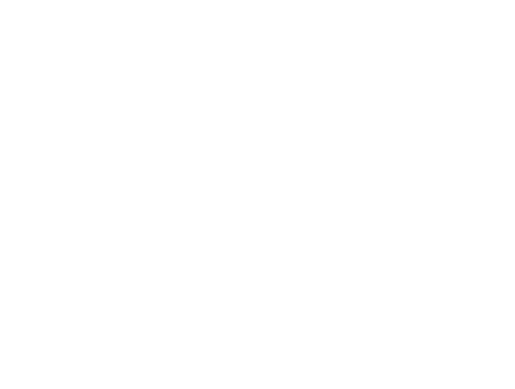

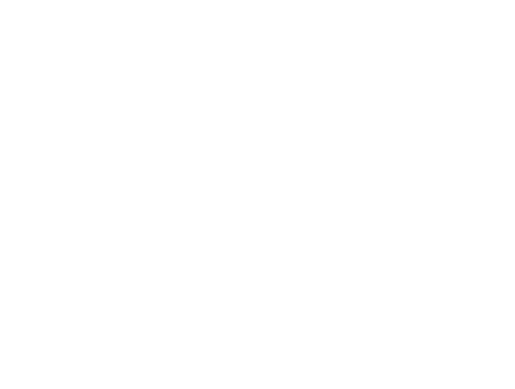

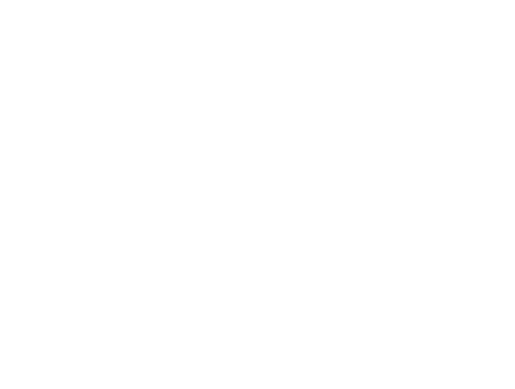

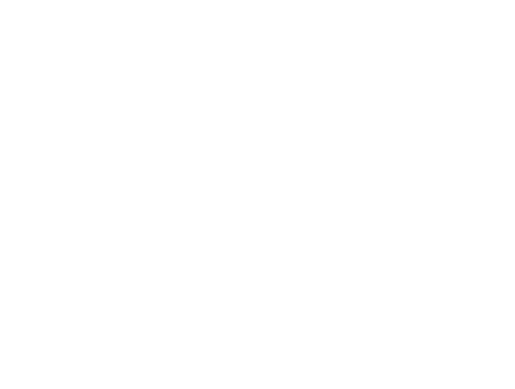

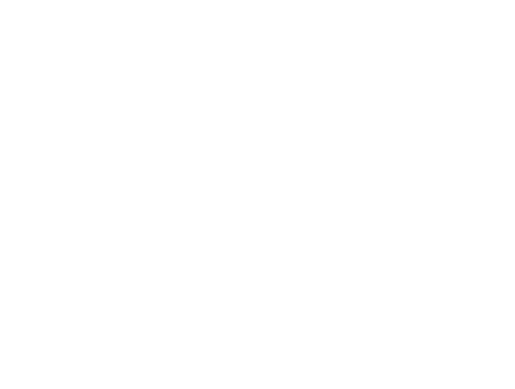

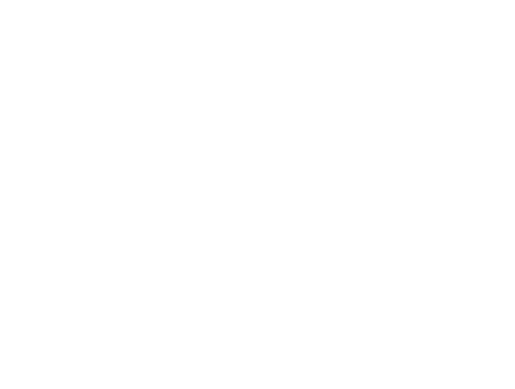

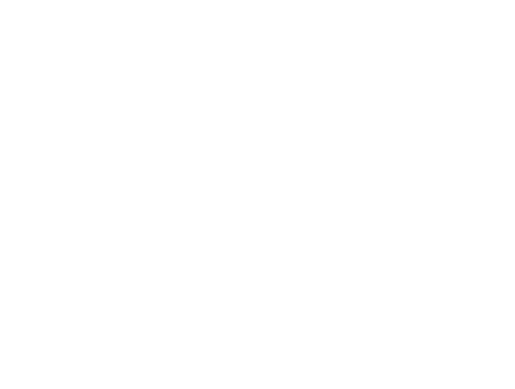

In [4]:
path_GT='1_GT'

for z in range(31):
    make_circ_pic(path_GT, t=z)

In [5]:
combine_images('/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/res_track', '/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/circ')

image_files ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png']
circ_files ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg']


/tmp/ipykernel_24649/556111889.py:220: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  circle_image = circle_image.resize((512, 512), Image.ANTIALIAS)


In [6]:
#path_GT='2_GT'

#for z in range(31):
#    make_id_pic(path_GT, t=z)